In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Load the data
train_data = pd.read_csv('fraudTrain.csv')
test_data = pd.read_csv('fraudTest.csv')

In [3]:
# Check the structure and info of the data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [4]:
# Check for missing values in the training dataset
print(train_data.isnull().sum())

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [5]:
# Preview the first few rows of training data
print(train_data.head(3))

   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   

                          merchant       category     amt      first     last  \
0       fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer    Banks   
1  fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie     Gill   
2             fraud_Lind-Buckridge  entertainment  220.11     Edward  Sanchez   

  gender                        street  ...      lat      long  city_pop  \
0      F                561 Perry Cove  ...  36.0788  -81.1781      3495   
1      F  43039 Riley Greens Suite 393  ...  48.8878 -118.2105       149   
2      M      594 White Dale Suite 530  ...  42.1808 -112.2620      4154   

                                 job         dob  \
0          Psychologist, counselling  1988-03-09   
1  Special educational needs teacher 

In [6]:
# Checking the test data structure and null values
test_data.info()
print(test_data.isnull().sum())
print(test_data.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [7]:
# Merging training and test data
combined_data = pd.concat([train_data, test_data])

In [8]:
# Checking the shape of the combined data
print(combined_data.shape)

(1852394, 23)


In [9]:
# Correlation with target variable 'is_fraud'
correlations = {}
for col in combined_data.columns:
    if combined_data[col].dtype != 'object' and col != 'is_fraud':
        correlations[col] = combined_data[col].corr(combined_data['is_fraud'])

print(correlations)

{'Unnamed: 0': 0.0005238292595403058, 'cc_num': -0.0011247864091594485, 'amt': 0.2093078472297204, 'zip': -0.002190364119647334, 'lat': 0.002903941085080607, 'long': 0.0010217606338494797, 'city_pop': 0.00032519441062586795, 'unix_time': -0.013328789485514903, 'merch_lat': 0.002777992413388992, 'merch_long': 0.0009994134859691098}


In [10]:
# Dropping unnecessary columns for prediction
columns_to_drop = ['Unnamed: 0', 'trans_date_trans_time', 'first', 'last', 'gender', 'street', 'job', 'dob', 'trans_num']
combined_data.drop(columns=columns_to_drop, inplace=True)

In [11]:
# Check if the necessary columns are left
print(combined_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 14 columns):
 #   Column      Dtype  
---  ------      -----  
 0   cc_num      int64  
 1   merchant    object 
 2   category    object 
 3   amt         float64
 4   city        object 
 5   state       object 
 6   zip         int64  
 7   lat         float64
 8   long        float64
 9   city_pop    int64  
 10  unix_time   int64  
 11  merch_lat   float64
 12  merch_long  float64
 13  is_fraud    int64  
dtypes: float64(5), int64(5), object(4)
memory usage: 212.0+ MB
None


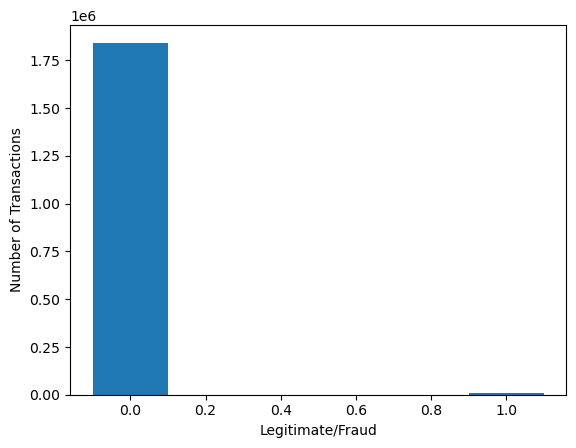

In [12]:
# Visualizing the class distribution
plt.bar(combined_data['is_fraud'].unique(), combined_data['is_fraud'].value_counts(), width=0.2)
plt.xlabel('Legitimate/Fraud')
plt.ylabel('Number of Transactions')
plt.show()

In [13]:
# Splitting the data into fraudulent and legitimate transactions
legitimate_data = combined_data[combined_data['is_fraud'] == 0]
fraud_data = combined_data[combined_data['is_fraud'] == 1]

In [14]:
# Balancing the data by sampling an equal number of legitimate transactions
legitimate_data = legitimate_data.sample(n=len(fraud_data))

In [15]:
# Checking the new shape of both datasets
print(legitimate_data.shape)
print(fraud_data.shape)

(9651, 14)
(9651, 14)


In [16]:
# Combining balanced data
balanced_data = pd.concat([legitimate_data, fraud_data])

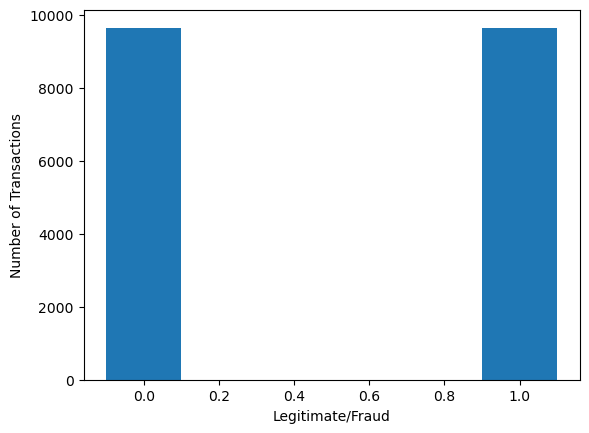

In [17]:
# Visualize the class distribution again after balancing
plt.bar(balanced_data['is_fraud'].unique(), balanced_data['is_fraud'].value_counts(), width=0.2)
plt.xlabel('Legitimate/Fraud')
plt.ylabel('Number of Transactions')
plt.show()

In [18]:
# Encoding categorical variables
label_encoder = LabelEncoder()
balanced_data['merchant'] = label_encoder.fit_transform(balanced_data['merchant'])
balanced_data['category'] = label_encoder.fit_transform(balanced_data['category'])
balanced_data['city'] = label_encoder.fit_transform(balanced_data['city'])
balanced_data['state'] = label_encoder.fit_transform(balanced_data['state'])

In [19]:
# Ensure all features are now numerical
print(balanced_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19302 entries, 580973 to 517571
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cc_num      19302 non-null  int64  
 1   merchant    19302 non-null  int32  
 2   category    19302 non-null  int32  
 3   amt         19302 non-null  float64
 4   city        19302 non-null  int32  
 5   state       19302 non-null  int32  
 6   zip         19302 non-null  int64  
 7   lat         19302 non-null  float64
 8   long        19302 non-null  float64
 9   city_pop    19302 non-null  int64  
 10  unix_time   19302 non-null  int64  
 11  merch_lat   19302 non-null  float64
 12  merch_long  19302 non-null  float64
 13  is_fraud    19302 non-null  int64  
dtypes: float64(5), int32(4), int64(5)
memory usage: 1.9 MB
None


In [20]:
# Prepare the feature set (X) and target variable (y)
X = balanced_data.iloc[:, :-1].values
y = balanced_data.iloc[:, -1].values

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [23]:
# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_train)

print("Logistic Regression - Accuracy on Training Data:", round(accuracy_score(y_train, logistic_predictions), 3))
print("Classification Report:\n", classification_report(y_train, logistic_predictions))


Logistic Regression - Accuracy on Training Data: 0.5
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67      6756
           1       0.00      0.00      0.00      6755

    accuracy                           0.50     13511
   macro avg       0.25      0.50      0.33     13511
weighted avg       0.25      0.50      0.33     13511



In [24]:
# Decision Tree Classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_train)

print("Decision Tree - Accuracy on Training Data:", round(accuracy_score(y_train, dt_predictions), 3))
print("Classification Report:\n", classification_report(y_train, dt_predictions))


Decision Tree - Accuracy on Training Data: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6756
           1       1.00      1.00      1.00      6755

    accuracy                           1.00     13511
   macro avg       1.00      1.00      1.00     13511
weighted avg       1.00      1.00      1.00     13511



In [25]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=50)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_train)

print("Random Forest - Accuracy on Training Data:", round(accuracy_score(y_train, rf_predictions), 3))
print("Classification Report:\n", classification_report(y_train, rf_predictions))

Random Forest - Accuracy on Training Data: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6756
           1       1.00      1.00      1.00      6755

    accuracy                           1.00     13511
   macro avg       1.00      1.00      1.00     13511
weighted avg       1.00      1.00      1.00     13511



In [26]:
# Evaluating on Test Data
test_predictions = logistic_model.predict(X_test)
print("Logistic Regression - Accuracy on Test Data:", round(accuracy_score(y_test, test_predictions), 3))
print("Classification Report:\n", classification_report(y_test, test_predictions))


Logistic Regression - Accuracy on Test Data: 0.5
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67      2895
           1       0.00      0.00      0.00      2896

    accuracy                           0.50      5791
   macro avg       0.25      0.50      0.33      5791
weighted avg       0.25      0.50      0.33      5791

